### Read restuls file from this path

In [162]:
filepath = 'result.txt'

### Imports

In [163]:
import matplotlib.pyplot as plt
import pandas as pd

### Function to extract plot matrix size and corresponding time 

In [164]:
size = []
naive = []
sse = []

def split_and_append(line) :
    words = line.split()
    if len(words):
        value = float(words[1])
        if words[0] == 'size' :
            size.append(value)
        elif words[0] == 'naive':
            naive.append(value)
        elif words[0] == 'sse':
            sse.append(value) 

### Read file

In [165]:
with open(filepath) as fp:
    line = fp.readline()
    split_and_append(line)
    while line :
        line = fp.readline()
        split_and_append(line)
fp.close()

### Debug

In [166]:
# print (size)
# print (naive)
# print (sse)

### plot

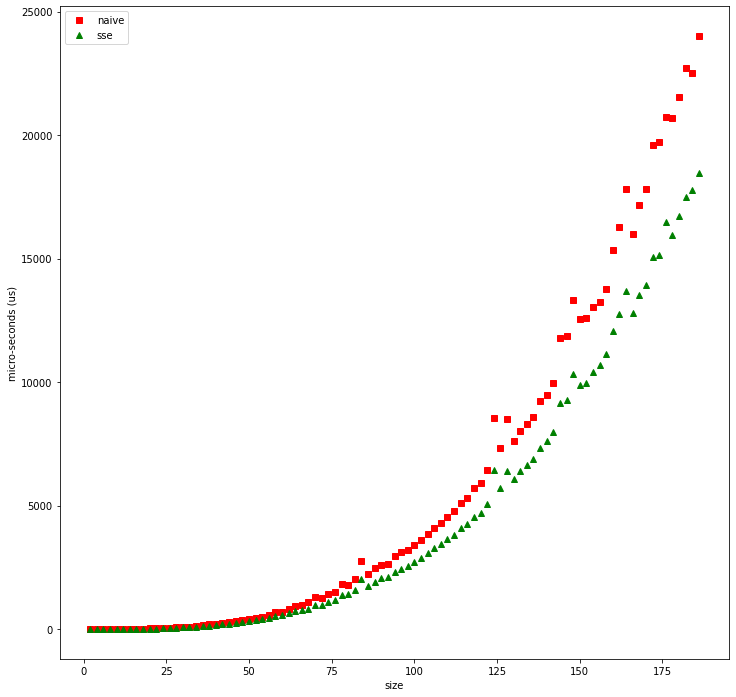

In [167]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.xlabel('size')
plt.ylabel('micro-seconds (us)')

plt.plot(size, naive, 'rs', label ='naive')
plt.plot(size, sse, 'g^', label ='sse')
plt.legend()

plt.show()

### Zooming on matrix of small size

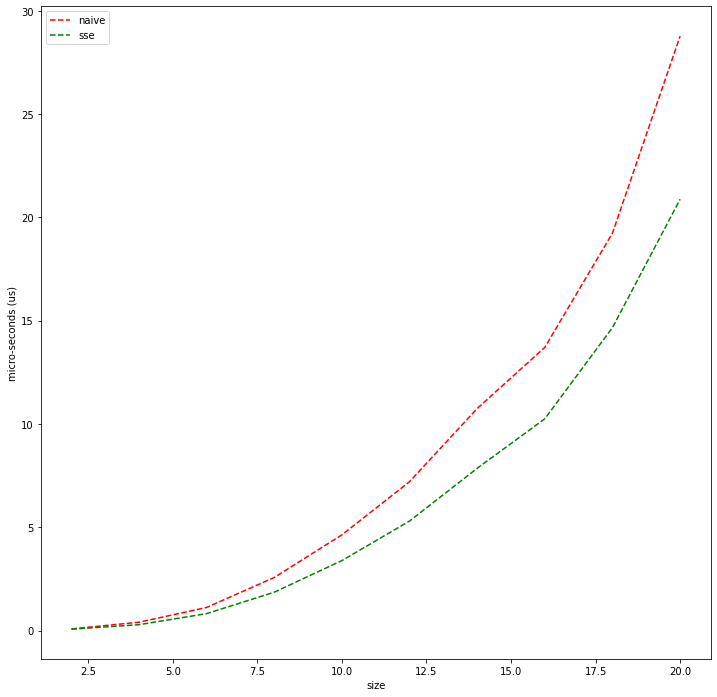

In [168]:
max_size = 10
size_small = size[:max_size]
naive_small = naive[:max_size]
sse_small = sse[:max_size]

plt.rcParams['figure.figsize'] = [12, 12]
plt.xlabel('size')
plt.ylabel('micro-seconds (us)')

plt.plot(size_small, naive_small, 'r--', label ='naive')
plt.plot(size_small, sse_small, 'g--', label ='sse')
plt.legend()

plt.show()

### manipulations

* Matix inner and outer dimension are even numbers
* Matrix MN holds data of type double (8 bytes / 64 bits) 
* SSE instruction has double precision  __m128d (128 bits - hold 2 doubles)
* since the Matrixsize is unknow before the compilations.  Bigger matrixis subdivided into smaller matrix of dimension 2 X 2
* Loop rate 
    * can be further increased by converting double precision (double) to single precesion (float)
    * Advanced vector extension instruction (avx) 
    * sse_prefetch

In [170]:
def naive_num_of_multiplications (m, n, p):
    return m * p * n * 1
def naive_num_of_additions ( m, n, p) :
    return m * p * (n-1) * 1
def sse_num_of_multiplications (m, n, p):
    return (m/2) * (p/2) * (n/2) * 4 
def sse_num_of_additions(m, n, p) :
    return (m/2) * (p/2) * (n/2) * 4 

In [171]:
sizes = []
naive_additions = []
naive_multiplications = []
sse_additions = []
sse_multiplications = []

for size in range(2, 100, 2) :
    sizes.append(size)
    naive_additions.append(naive_num_of_additions(size, size, size))
    naive_multiplications.append(naive_num_of_multiplications(size, size, size))
    sse_additions.append(sse_num_of_additions(size, size, size))
    sse_multiplications.append(sse_num_of_multiplications(size, size, size))
    

### debug

In [172]:
# print (sizes)
# print (naive_additions)
# print (naive_multiplications)
# print (sse_additions)
# print (sse_multiplications)

In [173]:
df = pd.DataFrame(list(zip(sizes, naive_additions, sse_additions, naive_multiplications, sse_multiplications)), columns = [ 'size', 'addition_naive', 'addition_sse', 'multiplication_naive', 'multiplication_sse'])
df

,size,addition_naive,addition_sse,multiplication_naive,multiplication_sse
0,2,4,4.0,8,4.0
1,4,48,32.0,64,32.0
2,6,180,108.0,216,108.0
3,8,448,256.0,512,256.0
4,10,900,500.0,1000,500.0
5,12,1584,864.0,1728,864.0
6,14,2548,1372.0,2744,1372.0
7,16,3840,2048.0,4096,2048.0
8,18,5508,2916.0,5832,2916.0
9,20,7600,4000.0,8000,4000.0
